Recruitment Case Study

One of the goals of our team is to understand customer behaviour and provide the right message at the right time to the right customer. To do this we try to understand how different customer segments behave and what they are likely to do next. This mandate requires a set of skills ranging from data cleaning, data manipulation, predictive modelling, data visualisation and the ability to articulate key messages to a Business audience.

Please note that the case study has been tested however as in real life this data is not necessarily clean.

This case study has 2 main components, the results of which should be delivered in a business friendly presentation
Business Intelligence

1. Using the data provided answer the following BI QUESTIONS:
    How Many Customers above 50 years old have taken up a loan?
    How Many Females aged 30 to 40 have more than 2 products? 
    What is the average number of Current Account(CA) Transactions for males who had a previous Loans
    How many females did not have a previous loans and who are aged
        Less than 20
        21 to 40
        40+


2. Predictive Modelling
The end goal is to create a predictive model allowing you to identify customers more likely to take on a loan
Emphasis will also be given to your ability to present the results and business benefits to engage a business audience, Data manipulation and cleaning, Application of your model to the test sample.
We have kept an hold out sample, the quality of your work will be partially based on the hit rate you have been able to achieve based on your prediction 
You will need to build the Test sample using the TEST_*.CSV files
The only thing missing is the loan flag 
You will still be able to score those 2000 individuals and put them into 5 groups
    Very High Likelihood
    High Likelihood
    Medium Likelihood
    Low Likelihood
    Very Low Likelihood
For each group define what you expect  the loan uptake rate (%) to be
You will need to define optimum size of High and Very High likelihood group based on business relevance
This code needs to be provided 12 hours ahead of the interview
Additional points will be awarded to those who go above and beyond the minimum required to achieve section 2 above. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# I added each csv file labelled Model Build 
# I removed duplicates and nas from each csv file 

# In this case I also had to add headings
product_held = pd.read_csv("Model Build - Product Held in Bank.csv",names =['Client ID', 'Products Held in Bank'])
product_held.drop_duplicates(subset="Client ID", keep=False, inplace=True)
product_held.dropna(inplace = True)

# I cleaned the data by removing the rows of ngative figures in products held in bank 
negatives = product_held[ product_held['Products Held in Bank'] < '0' ].index
product_held.drop(negatives , inplace=True)

# I checked the Client IDs were unique before setting them as the index
# This will allow me to use the Client ID to join all the csv files to the one data frame
#product_held['Client ID'].is_unique

# I also checked the data types 
#product_held.dtypes

product_held = product_held.set_index('Client ID')
product_held

,Products Held in Bank
Client ID,
1,4
2,4
3,2
4,2
5,1
...,...
9996,3
9997,5
9998,1


In [3]:
# Encoding was required here due to error messages 

prev_loan = pd.read_csv("Model Build - Previous Loan Holdings.csv", encoding = 'unicode_escape')
prev_loan.drop_duplicates(subset="Client ID", keep=False, inplace=True)
prev_loan.dropna(inplace = True)

# The held loan previously column included symbols which were removed 
prev_loan['Held Loan previously'] = prev_loan['Held Loan previously'].str.replace('-', '-1')
prev_loan['Held Loan previously'] = prev_loan['Held Loan previously'].str.replace('', '-1')
prev_loan['Held Loan previously'] = prev_loan['Held Loan previously'].str.replace('³', '-1')

# Negative figures in the held loan previously column were removed
negatives2 = prev_loan[ prev_loan['Held Loan previously'] < '0' ].index
prev_loan.drop(negatives2 , inplace=True)

#prev_loan['Client ID'].is_unique
#prev_loan.dtypes
prev_loan = prev_loan.set_index('Client ID')

prev_loan

,Held Loan previously
Client ID,
1,1
2,0
3,0
4,1
5,0
...,...
9996,0
9997,0
9998,0


In [4]:
demo = pd.read_csv("Model Build - Demographics.csv", encoding = 'unicode_escape')

# I removed unwanted columns and renamed the gender coloumn 
del demo['Unnamed: 5']
demo.rename(columns={'Gender \n1: Female, 2: Male':'Gender'}, inplace=True)
#demo['Gender'].map({'fem': 0})
demo.drop_duplicates(subset="Client ID", keep=False, inplace=True)
demo.dropna(inplace = True)

# I renamed column contents that did not contain 0 or 1 
demo['Gender'] = demo['Gender'].str.replace('female', '0')
demo['Gender'] = demo['Gender'].str.replace('Male', '1')
demo['Gender'] = demo['Gender'].str.replace('fem', '0')
demo['Gender'] = demo['Gender'].str.replace('M', '1')
demo['Gender'] = demo['Gender'].str.replace('f', '0')
demo['Gender'] = demo['Gender'].str.replace('m', '1')

# I removed and replaced unwanted symbols
demo['Income Group'] = demo['Income Group'].str.replace('?', '-')
demo['Income Group'] = demo['Income Group'].str.replace('.', '')
demo['Income Group'] = demo['Income Group'].str.replace('2','1')
demo['Income Group'] = demo['Income Group'].str.replace('  - ',' - ')

# I cleaned the data by removing ages greater than 100
age = demo[ demo['Age'] > 100 ].index
demo.drop(age , inplace=True)

#demo['Client ID'].is_unique
demo = demo.set_index('Client ID')

demo

,Age,Gender,County,Income Group
Client ID,,,,
1,36,1,Cork,10001 - 40000
2,43,1,Cavan,0 - 10000
3,32,0,Dublin,10001 - 40000
4,52,1,Louth,40001 - 60000
5,63,0,Kilkenny,60001 - 100000
...,...,...,...,...
9996,70,1,Cork,10001 - 40000
9997,36,1,Galway,10001 - 40000
9998,43,1,Laois,10001 - 40000


In [5]:
txn_amount = pd.read_csv("Model Build - TXN Amount.csv",names =['Client ID', 'Average amount of CA transaction'], encoding = 'unicode_escape')
txn_amount.drop_duplicates(subset="Client ID", keep=False, inplace=True)
txn_amount.dropna(inplace = True)

# I removed the euro symbols
txn_amount['Average amount of CA transaction'] = txn_amount['Average amount of CA transaction'].str.replace('', '')

#txn_amount['Client ID'].is_unique
#txn_amount.dtypes

txn_amount = txn_amount.set_index('Client ID')
txn_amount

,Average amount of CA transaction
Client ID,
1,58
2,"2,663"
3,46
4,0
5,126
...,...
9996,"1,501"
9997,185
9998,0


In [6]:
# I noticed the transactions out of current account csv file in the Model Build folder had client ids which did not match the other csv files
# I therefore assumed this was an error and decided to use the TEST transactions out of current account csv file since the client ids alligned and could be joined to the other model build csv files
# I chose the columns that were required
txn_ca = pd.read_csv("TEST - Transactions out of Current Account.csv", encoding = 'unicode_escape', usecols=['Client', 'Num Transactions', 'Last TXN Amount', 'Merchant Code', 'Last Transaction Narrative'])
txn_ca.drop_duplicates(subset="Client", keep=False, inplace=True)
txn_ca.dropna(inplace = True)
# I renamed the client column assuming this was client ids and changed the data type to int
txn_ca.rename(columns={'Client':'Client ID'}, inplace=True)
txn_ca['Client ID'] = txn_ca['Client ID'].astype(int)

#txn_ca['Client'].is_unique
#txn_ca.dtypes
txn_ca = txn_ca.set_index('Client ID')
txn_ca

,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative
Client ID,,,,
2,17.0,83.66,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN
3,25.0,526.18,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV
4,13.0,70.68,5712.0,HARVEY NORMAN CARRICKMINES
5,39.0,259.07,5999.0,PAYPAL *PETEWOODWAR 35314369001
6,39.0,257.15,3661.0,METROPARK HTL KLN HK10900HONG KONG
...,...,...,...,...
9994,4.0,130.34,7278.0,Groupon www.groupon.p
9996,18.0,332.96,7379.0,LAPTECK LTD GALWAY
9997,5.0,222.59,3730.0,MGM GRAND - FRONT DESK LAS VEGAS NV


In [7]:
# I joined all the csv files to create a final data frame using an inner join as i wanted all columns to contain a record since the data set is large 
merged_inner1 = pd.merge(left=product_held,right=prev_loan, left_on='Client ID', right_on='Client ID')
merged_inner2 = pd.merge(left=merged_inner1,right=demo, left_on='Client ID', right_on='Client ID')
merged_inner3 = pd.merge(left=merged_inner2,right=txn_amount, left_on='Client ID', right_on='Client ID')
finaldf = pd.merge(left=merged_inner3,right=txn_ca, left_on='Client ID', right_on='Client ID')
finaldf

,Products Held in Bank,Held Loan previously,Age,Gender,County,Income Group,Average amount of CA transaction,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative
Client ID,,,,,,,,,,,
2,4,0,43,1,Cavan,0 - 10000,"2,663",17.0,83.66,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN
3,2,0,32,0,Dublin,10001 - 40000,46,25.0,526.18,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV
4,2,1,52,1,Louth,40001 - 60000,0,13.0,70.68,5712.0,HARVEY NORMAN CARRICKMINES
5,1,0,63,0,Kilkenny,60001 - 100000,126,39.0,259.07,5999.0,PAYPAL *PETEWOODWAR 35314369001
6,2,0,33,0,Louth,10001 - 40000,338,39.0,257.15,3661.0,METROPARK HTL KLN HK10900HONG KONG
...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,26,1,Longford,40001 - 60000,"2,378",4.0,130.34,7278.0,Groupon www.groupon.p
9996,3,0,70,1,Cork,10001 - 40000,"1,501",18.0,332.96,7379.0,LAPTECK LTD GALWAY
9997,5,0,36,1,Galway,10001 - 40000,185,5.0,222.59,3730.0,MGM GRAND - FRONT DESK LAS VEGAS NV


In [8]:
# I exported this data frame to a csv file as I will be using tableau to visualise the results as I am assuming the business is more familiar with the tool
finaldf.to_csv(r'C:\Users\C3\Documents\boi\final_df.csv')

In [9]:
# This is my final data frame
finaldf

,Products Held in Bank,Held Loan previously,Age,Gender,County,Income Group,Average amount of CA transaction,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative
Client ID,,,,,,,,,,,
2,4,0,43,1,Cavan,0 - 10000,"2,663",17.0,83.66,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN
3,2,0,32,0,Dublin,10001 - 40000,46,25.0,526.18,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV
4,2,1,52,1,Louth,40001 - 60000,0,13.0,70.68,5712.0,HARVEY NORMAN CARRICKMINES
5,1,0,63,0,Kilkenny,60001 - 100000,126,39.0,259.07,5999.0,PAYPAL *PETEWOODWAR 35314369001
6,2,0,33,0,Louth,10001 - 40000,338,39.0,257.15,3661.0,METROPARK HTL KLN HK10900HONG KONG
...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,26,1,Longford,40001 - 60000,"2,378",4.0,130.34,7278.0,Groupon www.groupon.p
9996,3,0,70,1,Cork,10001 - 40000,"1,501",18.0,332.96,7379.0,LAPTECK LTD GALWAY
9997,5,0,36,1,Galway,10001 - 40000,185,5.0,222.59,3730.0,MGM GRAND - FRONT DESK LAS VEGAS NV


In [10]:
# These are the final data frame's data types
finaldf.dtypes

Products Held in Bank                object
Held Loan previously                 object
Age                                   int64
Gender                               object
County                               object
Income Group                         object
Average amount of CA transaction     object
Num Transactions                    float64
Last TXN Amount                     float64
Merchant Code                       float64
Last Transaction Narrative           object
dtype: object

In [11]:
# I changed some of the data types to int
finaldf['Products Held in Bank'] = finaldf['Products Held in Bank'].astype(int)
finaldf['Held Loan previously'] = finaldf['Held Loan previously'].astype(int)
finaldf['Num Transactions'] = finaldf['Num Transactions'].astype(int)
finaldf['Last TXN Amount'] = finaldf['Last TXN Amount'].astype(int)
finaldf['Gender'] = finaldf['Gender'].astype(int)

finaldf.dtypes

Products Held in Bank                 int64
Held Loan previously                  int64
Age                                   int64
Gender                                int64
County                               object
Income Group                         object
Average amount of CA transaction     object
Num Transactions                      int64
Last TXN Amount                       int64
Merchant Code                       float64
Last Transaction Narrative           object
dtype: object

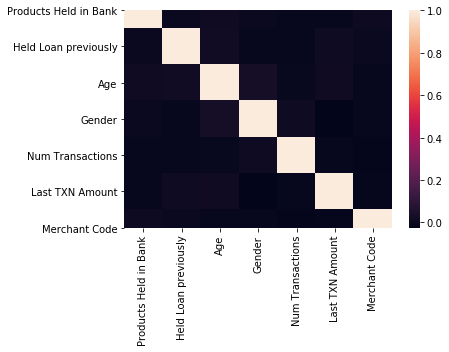

In [12]:
# I did this to see the correlation of the variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = finaldf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
# I imported more data libraries for the predictive model
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

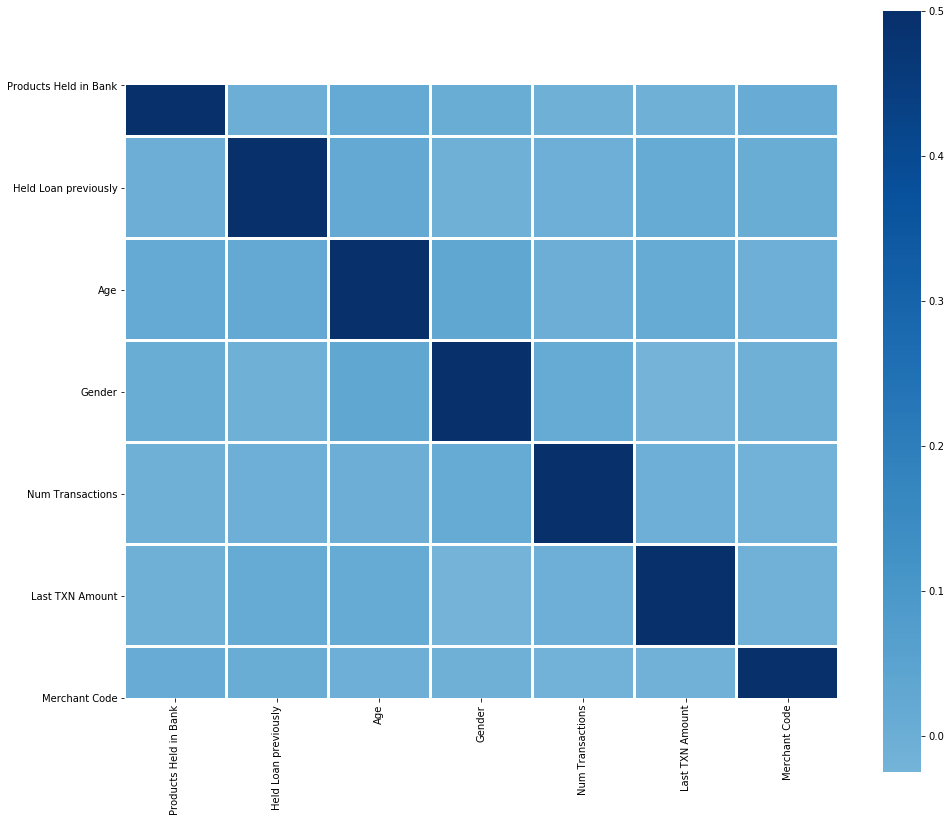

In [14]:
# and found the correlation
import seaborn as sns
corr = finaldf.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [15]:
# this gives me the figures
finaldf.corr()['Age']

Products Held in Bank    0.016346
Held Loan previously     0.021856
Age                      1.000000
Gender                   0.033810
Num Transactions        -0.001345
Last TXN Amount          0.015490
Merchant Code           -0.005984
Name: Age, dtype: float64

In [16]:
# I uploaded the target file within the model build since I didn't use it previously 
target = pd.read_csv("Target Variable - Purchased Loan Flag.csv", usecols=['Client ID', 'Loan Flag'])
target.drop_duplicates(subset="Client ID", keep=False, inplace=True)
target.dropna(inplace = True)

#target['Client ID'].is_unique
#target.dtypes
target = target.set_index('Client ID')
target

,Loan Flag
Client ID,
1,0
2,0
3,0
4,0
5,0
...,...
9996,0
9997,0
9998,0


In [17]:
# and created a new data frame to include the target csv file
finaldf1 = pd.merge(left=finaldf,right=target, left_on='Client ID', right_on='Client ID')
finaldf1

,Products Held in Bank,Held Loan previously,Age,Gender,County,Income Group,Average amount of CA transaction,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative,Loan Flag
Client ID,,,,,,,,,,,,
2,4,0,43,1,Cavan,0 - 10000,"2,663",17,83,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN,0
3,2,0,32,0,Dublin,10001 - 40000,46,25,526,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV,0
4,2,1,52,1,Louth,40001 - 60000,0,13,70,5712.0,HARVEY NORMAN CARRICKMINES,0
5,1,0,63,0,Kilkenny,60001 - 100000,126,39,259,5999.0,PAYPAL *PETEWOODWAR 35314369001,0
6,2,0,33,0,Louth,10001 - 40000,338,39,257,3661.0,METROPARK HTL KLN HK10900HONG KONG,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,26,1,Longford,40001 - 60000,"2,378",4,130,7278.0,Groupon www.groupon.p,0
9996,3,0,70,1,Cork,10001 - 40000,"1,501",18,332,7379.0,LAPTECK LTD GALWAY,0
9997,5,0,36,1,Galway,10001 - 40000,185,5,222,3730.0,MGM GRAND - FRONT DESK LAS VEGAS NV,0


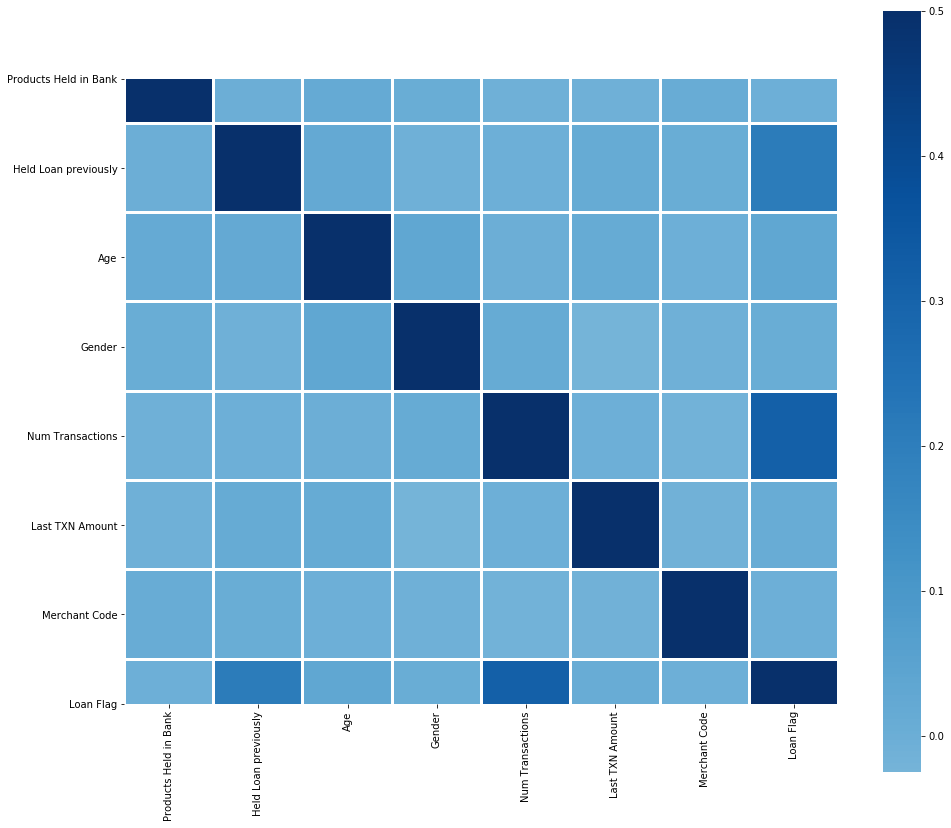

In [18]:
# I then found the correlation of the loan flag
finaldf1.corr()['Loan Flag']

corr = finaldf1.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [19]:
# I dropped columns with -ve correlation and the loan flag 
predictors = finaldf1.drop(['Loan Flag','Products Held in Bank','Merchant Code','County', 'Income Group', 'Last TXN Amount','Average amount of CA transaction','Last Transaction Narrative'], axis=1)
# and created a new data frame
targets = finaldf1['Loan Flag']

In [20]:
# these are the columns that are available for the model 
print(predictors.columns)

Index(['Held Loan previously', 'Age', 'Gender', 'Num Transactions'], dtype='object')


In [21]:
# I split the data into train and test, with a test size of 30%

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (4694, 4) Predictor - Testing :  (2012, 4)


In [22]:
# I am using a naive bayes classififer, where I instantiate it, fit it, then predict using it, then analyse the accuracy of the predictions

from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

#Analyze accuracy of predictions
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[1929,   16],
       [  37,   30]])

In [23]:
# I apply an accuracy score to the model
sklearn.metrics.accuracy_score(y_test, predictions)

0.9736580516898609

In [33]:
# I now import the Test Data

In [24]:
# As mentioned earlier I used the TEST Transactions out of Current Account csv file eaarlier as I assumed this was placed in the TEST folder as a mistake
# The client ids in the model build Transactions out of Current Account csv file can join on the other TEST csv files

txn_ca2 = pd.read_csv("Model Build - Transactions out of Current Account.csv", encoding = 'unicode_escape', usecols=['Client', 'Num Transactions', 'Last TXN Amount', 'Merchant Code', 'Last Transaction Narrative'])
txn_ca2.drop_duplicates(subset="Client", keep=False, inplace=True)
txn_ca2.dropna(inplace = True)
txn_ca2.rename(columns={'Client':'Client ID'}, inplace=True)
txn_ca2['Client ID'] = txn_ca2['Client ID'].astype(int)

#txn_ca2['Client'].is_unique
#txn_ca2.dtypes

#txn_ca2 = txn_ca2.set_index('Client ID')
txn_ca2

,Client ID,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative
0,10706,4,879.40,3700,0002 - MOTEL 6 SANTA BARBARACA
1,11992,2,898.46,3700,0025 - MOTEL 6 GILROY CA
2,11284,4,216.43,4723,0340708011347459044271351BERLIN
3,10412,27,330.20,5021,121 OFFICE FURNITURE CUMBERNAULD
4,11183,9,1010.39,6300,123 MONEY LTD DUBLIN 18
...,...,...,...,...,...
1995,10072,34,12.00,7841,XTRA-VISION ARKLOW
1996,10390,46,1149.38,5967,YellowPlum +17862203317
1997,10276,25,635.86,5691,ZARA HENRY ST DUBLIN
1998,10308,82,809.29,8099,ZENERGY HEALTH & BEAUT DUBLIN 2


In [25]:
# The data in this file started on the second row of the csv file so that had to be considered 

product_held2 = pd.read_csv("TEST - Product Held in Bank.csv", skiprows=1)
    
del product_held2['Unnamed: 2']
del product_held2['Unnamed: 3']
del product_held2['Unnamed: 4']
del product_held2['Unnamed: 5']
del product_held2['Unnamed: 6']
product_held2.rename(columns={'# Products in bank':'Products Held in Bank'}, inplace=True)

product_held2.drop_duplicates(subset="Client ID", keep=False, inplace=True)
product_held2.dropna(inplace = True)

#product_held2['Client ID'].is_unique
#product_held2.dtypes
#product_held2 = product_held2.set_index('Client ID')
product_held2

,Client ID,Products Held in Bank
0,10001,4
1,10002,4
2,10003,2
3,10004,2
4,10005,1
...,...,...
1995,11996,5
1996,11997,3
1997,11998,1
1998,11999,2


In [26]:
prev_loan2 = pd.read_csv("TEST- Previous Loan Holdings.csv", encoding = 'unicode_escape', usecols=['Client ID', 'Held Loan previously'])
prev_loan2.drop_duplicates(subset="Client ID", keep=False, inplace=True)
prev_loan2.dropna(inplace = True)

#prev_loan2['Client ID'].is_unique
#prev_loan2.dtypes
#prev_loan2 = prev_loan2.set_index('Client ID')

prev_loan2

,Client ID,Held Loan previously
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10005,0
...,...,...
9999,20000,0
10000,20001,0
10001,20002,0
10002,20003,1


In [27]:
demo2 = pd.read_csv("TEST - Demographics.csv", encoding = 'unicode_escape')

demo2.rename(columns={'Gender \n1: Female, 2: Male':'Gender'}, inplace=True)
demo2.drop_duplicates(subset="Client ID", keep=False, inplace=True)
demo2.dropna(inplace = True)

#demo2['Client ID'].is_unique
#demo2 = demo2.set_index('Client ID')

demo2

,Client ID,Age,Gender,County,Income Group
0,10001,59,1,Cork,10001 - 40000
1,10002,27,1,Kerry,10001 - 40000
2,10003,58,0,Louth,10001 - 40000
3,10004,45,1,Dublin,60001 - 100000
4,10005,21,0,Dublin,40001 - 60000
...,...,...,...,...,...
1995,11996,38,0,Clare,60001 - 100000
1996,11997,31,0,Donegal,10001 - 40000
1997,11998,33,1,Cork,100000+
1998,11999,37,1,Dublin,60001 - 100000


In [28]:
# The data in this file started on the second row of the csv file so that had to be considered 

txn_amount2 = pd.read_csv("TEST - TXN Amount.csv",usecols=['Client ID', 'Average amount of CA transaction'], encoding = 'unicode_escape', skiprows=1)
txn_amount2.drop_duplicates(subset="Client ID", keep=False, inplace=True)
txn_amount2.dropna(inplace = True)

#txn_amount2['Client ID'].is_unique
#txn_amount.dtypes

#txn_amount2 = txn_amount2.set_index('Client ID')
txn_amount2

,Client ID,Average amount of CA transaction
0,10001,22
1,10002,11
2,10003,9
3,10004,34
4,10005,38
...,...,...
1995,11996,1628
1996,11997,2039
1997,11998,439
1998,11999,855


In [29]:
# I joined all the TEST csv files to create another data frame using an inner join as i wanted all columns to contain a record since the data set is large 
merged_inner4 = pd.merge(left=product_held2,right=prev_loan2, left_on='Client ID', right_on='Client ID')
merged_inner5 = pd.merge(left=merged_inner4,right=demo2, left_on='Client ID', right_on='Client ID')
merged_inner6 = pd.merge(left=merged_inner5,right=txn_amount2, left_on='Client ID', right_on='Client ID')
finaldf2 = pd.merge(left=merged_inner6,right=txn_ca2, left_on='Client ID', right_on='Client ID')
finaldf2

,Client ID,Products Held in Bank,Held Loan previously,Age,Gender,County,Income Group,Average amount of CA transaction,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative
0,10001,4,0,59,1,Cork,10001 - 40000,22,2,12.59,7375,MYWHEELS IE DUBLIN 2
1,10002,4,0,27,1,Kerry,10001 - 40000,11,0,30.00,7531,MAXOL/MACE BRENNAN'S NEWBRIDGE
2,10003,2,0,58,0,Louth,10001 - 40000,9,28,1003.01,5533,Finglas Autoparts Limit Dublin
3,10004,2,0,45,1,Dublin,60001 - 100000,34,31,873.25,3692,DOUBLETREE CHELSEA
4,10005,1,0,21,0,Dublin,40001 - 60000,38,12,926.75,3659,TAJ HOTELS INTERNATIONAL Aurangabad
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,11996,5,0,38,0,Clare,60001 - 100000,1628,5,766.85,3381,WWW.EUROPCAR.IE LIMERICK
1996,11997,3,1,31,0,Donegal,10001 - 40000,2039,7,60.83,7392,HORSE RACING IRELAND CO KILDARE
1997,11998,1,0,33,1,Cork,100000+,439,3,561.44,3069,SUNCTRYAIR 3378204673043SAINT PAUL MN
1998,11999,2,0,37,1,Dublin,60001 - 100000,855,1,1117.40,3049,TUNIS AIR 75PARIS 8 VPC


In [30]:
# this data frame is now our sample data
print(finaldf2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 12 columns):
Client ID                           2000 non-null int64
Products Held in Bank               2000 non-null int64
Held Loan previously                2000 non-null int64
Age                                 2000 non-null int64
Gender                              2000 non-null int64
County                              2000 non-null object
Income Group                        2000 non-null object
Average amount of CA transaction    2000 non-null int64
Num Transactions                    2000 non-null int64
Last TXN Amount                     2000 non-null float64
Merchant Code                       2000 non-null int64
Last Transaction Narrative          2000 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 203.1+ KB
None


In [31]:
# I created a new data frame where I droped Client ID before predicting the data, so that is matches the model build data  
# I also dropped the other unwanted fields as was done previously 

finaldf3 = finaldf2.drop(['Client ID','Products Held in Bank','Merchant Code','County', 'Income Group', 'Last TXN Amount','Average amount of CA transaction','Last Transaction Narrative'], axis=1)

print(finaldf3.head(10))

   Held Loan previously  Age  Gender  Num Transactions
0                     0   59       1                 2
1                     0   27       1                 0
2                     0   58       0                28
3                     0   45       1                31
4                     0   21       0                12
5                     0   38       0                73
6                     0   43       0                 0
7                     1   45       1                 3
8                     0   44       0                11
9                     0   52       0                36


In [32]:
# Just to check the shape we should expect 
finaldf3.shape

(2000, 4)

In [33]:
# I can now run the predictions and insert them into the new 'Propensity' field
finaldf3['Propensity'] = classifier.predict_proba(finaldf3)[:,1]

print(finaldf3.head())

   Held Loan previously  Age  Gender  Num Transactions  Propensity
0                     0   59       1                 2    0.000997
1                     0   27       1                 0    0.000649
2                     0   58       0                28    0.002543
3                     0   45       1                31    0.002733
4                     0   21       0                12    0.000823


In [34]:
# I bring in Client ID again so we can identify the customers 
results = pd.concat([finaldf2['Client ID'], finaldf3], axis=1)
results = results.set_index('Client ID')
results

,Held Loan previously,Age,Gender,Num Transactions,Propensity
Client ID,,,,,
10001,0,59,1,2,0.000997
10002,0,27,1,0,0.000649
10003,0,58,0,28,0.002543
10004,0,45,1,31,0.002733
10005,0,21,0,12,0.000823
...,...,...,...,...,...
11996,0,38,0,5,0.000778
11997,1,31,0,7,0.012387
11998,0,33,1,3,0.000750


In [35]:
# I exported this data frame to a csv file as I will be using tableau to visualise the results as I am assuming the business is more familiar with the tool
results.to_csv(r'C:\Users\C3\Documents\boi\results.csv')